In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
import pandas as pd

In [13]:
df = pd.read_csv('/content/drive/MyDrive/DataScience/Auditoriski/data/Position_Salaries.csv')

In [14]:
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [15]:
import seaborn as sns

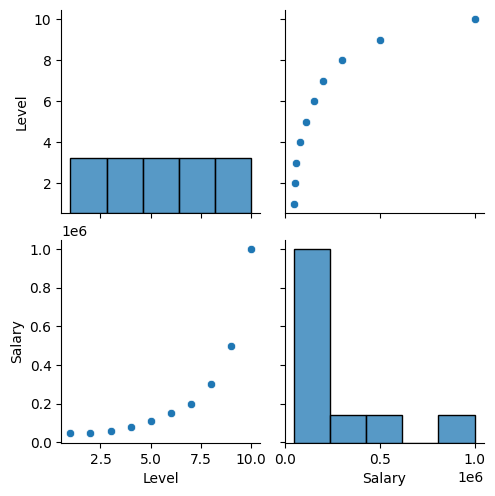

In [16]:
sns.pairplot(df)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,1:2],df.iloc[:,2:3],test_size=0.2)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(X_train)

StandardScaler()

In [22]:
X_test = scaler.transform(X_test)
X_train = scaler.transform(X_train)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
poly_reg = PolynomialFeatures(4)

In [25]:
X_poly = poly_reg.fit_transform(X_train)

In [26]:
X_poly

array([[ 1.00000000e+00, -1.11063159e+00,  1.23350254e+00,
        -1.36996689e+00,  1.52152851e+00],
       [ 1.00000000e+00, -1.23403510e-01,  1.52284264e-02,
        -1.87924128e-03,  2.31904970e-04],
       [ 1.00000000e+00,  1.19290060e+00,  1.42301184e+00,
         1.69751168e+00,  2.02496271e+00],
       [ 1.00000000e+00, -7.81555566e-01,  6.10829103e-01,
        -4.77396886e-01,  3.73112193e-01],
       [ 1.00000000e+00,  2.05672517e-01,  4.23011844e-02,
         8.70019109e-03,  1.78939020e-03],
       [ 1.00000000e+00,  1.52197663e+00,  2.31641286e+00,
         3.52552624e+00,  5.36576854e+00],
       [ 1.00000000e+00,  5.34748545e-01,  2.85956007e-01,
         1.52914559e-01,  8.17708378e-02],
       [ 1.00000000e+00, -1.43970762e+00,  2.07275804e+00,
        -2.98416555e+00,  4.29632588e+00]])

In [27]:
poly_reg.fit(X_poly,Y_train)

PolynomialFeatures(degree=4)

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_poly,Y_train)

LinearRegression()

In [31]:
X_test_poly = poly_reg.fit_transform(X_test)

In [32]:
y_pred = model.predict(X_test_poly)

In [33]:
y_pred

array([[279820.39969939],
       [103187.36604782]])

In [34]:
Y_test

,Salary
7,300000
3,80000


In [35]:
from sklearn.metrics import mean_squared_error

In [36]:
mean_squared_error(Y_test,y_pred)

472435106.26396126

In [37]:
Y_sc_train = scaler.fit_transform(Y_train)
Y_sc_test = scaler.transform(Y_test)

In [38]:
train = []
test = []
for i in range(0,10):
  poly = PolynomialFeatures(degree=i)
  X_poly = poly.fit_transform(X_train)
  model = LinearRegression()
  model.fit(X_poly,Y_train)
  X_test_poly = poly.fit_transform(X_test)
  y_pred = model.predict(X_test_poly)
  train.append(mean_squared_error(Y_train, model.predict(X_poly)))
  test.append(mean_squared_error(Y_test, y_pred))

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt

In [40]:
import numpy as np

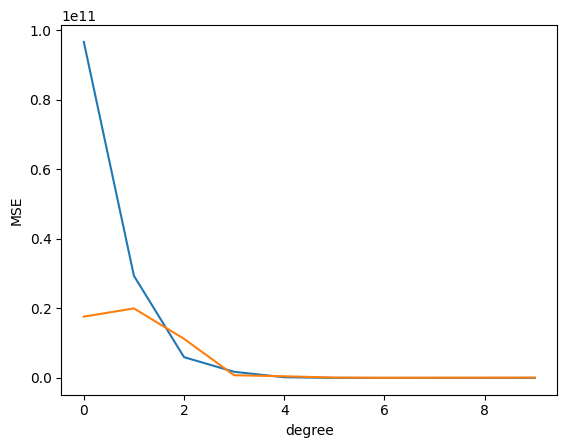

In [41]:
plt.plot(np.arange(10),train,label='Train')
plt.plot(np.arange(10),test,label='Test')
plt.xlabel('degree')
plt.ylabel('MSE')
plt.show()

# Ridge regularization & Cross Validation

In [42]:
from sklearn.kernel_ridge import KernelRidge

In [43]:
model = KernelRidge(alpha=0.003,kernel='poly',degree=4,gamma=1,coef0=1)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [45]:
cv = RepeatedKFold(n_splits=6,n_repeats=5)

In [46]:
scores = cross_val_score(model,X_train,Y_train,scoring='neg_mean_absolute_error',cv=cv)

In [47]:
scores = np.absolute(scores)

In [48]:
scores

array([ 48109.72532399,  91047.93059602, 127711.36141293,  11425.46674786,
        75323.60276262,  31880.18842905,  69024.21798247,  40731.64276858,
         8401.57593439, 185588.34128743,  37591.20774312,  11425.46674786,
        70194.78637859, 117137.69103248, 185588.34128743,   8401.57593439,
        34075.91736369, 127711.36141293,  28637.01124745, 161631.06584946,
         8401.57593439,  75323.60276262,  31880.18842905, 185588.34128743,
        69024.21798247,  17190.81152119, 185588.34128743,  37591.20774312,
        11425.46674786,  75323.60276262])

In [49]:
scores.mean()

72299.19449003128

In [50]:
scores.std()

59133.31240148266

In [51]:
model.fit(X_train,Y_train)

KernelRidge(alpha=0.003, degree=4, gamma=1, kernel='poly')

In [52]:
model.predict(X_test)

array([[279938.03932407],
       [103023.33504942]])

In [53]:
Y_test

,Salary
7,300000
3,80000
